# Computation speed benchmark

In this notebook, we tested the average computation speed for various models in different cases.

In [1]:
import multiprocessing
import os
import platform
import re
import subprocess
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML, display

## Local machine details

Log the local machine details on which the test is carried out:

In [2]:
def get_cpu_model(spec="model name"):
    if platform.system() == "Windows":
        return platform.processor()
    if platform.system() == "Darwin":
        os.environ["PATH"] = os.environ["PATH"] + os.pathsep + "/usr/sbin"
        command = "sysctl -n machdep.cpu.brand_string"
        return subprocess.check_output(command).strip()
    if platform.system() == "Linux":
        command = "cat /proc/cpuinfo"
        stream = os.popen(command)
        all_info = stream.read()
        all_info.strip()
        all_info = all_info.split("\n")
        # all_info = str(subprocess.check_output(command, shell=True).strip())
        for line in all_info:
            if spec in line:
                return re.sub(f".*{spec}.*: ", "", line, 1)

In [3]:
def get_specs():
    table = [
        # ["", platform.version()],
        ["Machine", platform.machine()],
        ["Platform", platform.platform()],
        ["Architecture", platform.architecture()],
        ["Cores", get_cpu_model("model name")],
        ["Number of cores", multiprocessing.cpu_count()],
        ["Python version", platform.python_version()],
    ]
    dataframe = pd.DataFrame(table, columns=["Spec", "Value"])
    display(HTML(dataframe.to_html(index=False)))

In [4]:
get_specs()

Spec,Value
Machine,x86_64
Platform,Linux-5.10.102.1-microsoft-standard-WSL2-x86_64-with-glibc2.29
Architecture,"(64bit, ELF)"
Cores,Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz
Number of cores,8
Python version,3.8.10


## Test function

Create a test function to test the models:

In [ ]:
def test_model(Model, n):

    init_time = list()
    encode_time = list()
    decode_time = list()
    total_time = list()

    # Iterations for computing mean and standard deviation
    iterations = 50

    for i in range(1, iterations + 1):
        # Initialization
        start_process = time.time()
        model = Model(n, 1)
        # Encoding
        start_encode = time.time()
        for dim in range(model.n):
            model.encode(0.5, dim)
        # Decoding
        start_decode = time.time()
        result = model.decode()
        end_process = time.time()

        # Store timings
        init_time.append(start_encode - start_process)
        encode_time.append(start_decode - start_encode)
        decode_time.append(end_process - start_decode)
        total_time.append(end_process - start_process)

    return [
        n,
        np.mean(init_time),
        np.mean(encode_time),
        np.mean(decode_time),
        np.mean(total_time),
        np.std(total_time),
    ]

In [17]:
def plot_results(df, title="Model"):
    """Plot all the results"""

    # Total timewith STD
    fig = plt.figure(figsize=(15, 6), dpi=150)

    df.plot(
        x="n",
        y=[4],
        yerr="Total STD",
        uplims=True,
        lolims=True,
        kind="line",
        color="r",
        ax=plt.gca(),
    )
    plt.title(f"{title} - Total time with STD")

    plt.grid(visible=True, which="major", linestyle="-")
    plt.grid(visible=True, which="minor", linestyle="--", alpha=0.2)
    plt.minorticks_on()

    plt.show()

    # Timings insight
    fig = plt.figure(figsize=(15, 6), dpi=150)

    df.plot(x="n", y=[1, 2, 3, 4], kind="line", ax=plt.gca())
    plt.title(f"{title} - Timings insight")

    plt.grid(visible=True, which="major", linestyle="-")
    plt.grid(visible=True, which="minor", linestyle="--", alpha=0.2)
    plt.minorticks_on()

    plt.show()

    # Zooming in
    print("Zooming in:")
    fig = plt.figure(figsize=(15, 6), dpi=150)

    df.plot(x="n", y=[1, 2], kind="line", ax=plt.subplot(1, 2, 1))
    plt.title("Initialization and encoding only")

    plt.grid(visible=True, which="major", linestyle="-")
    plt.grid(visible=True, which="minor", linestyle="--", alpha=0.2)
    plt.minorticks_on()

    ax = plt.subplot(1, 2, 2)
    df[1:19].plot(x="n", y=[1, 2, 3], kind="line", ax=ax)
    df[1:19].plot(x="n", y=[4], yerr="Total STD", kind="line", ax=ax)
    plt.title("Showing results for n < 20")

    plt.grid(visible=True, which="major", linestyle="-")
    plt.grid(visible=True, which="minor", linestyle="--", alpha=0.2)
    plt.minorticks_on()

    plt.show()


## AngularModel
We test the initialization, encode and decode time for a input of .5 on each dimension, for increasing dimensions ($n \in [0,26]$)

In [6]:
from qrobot.models import AngularModel

max_n = 26

In [7]:
table = list()

for n in range(1, max_n + 1):
    print(f"Testing n={n}", end="\r")
    table.append(test_model(AngularModel, n))
print("             ")

df_angular = pd.DataFrame(
    table, columns=["n", "Initialization", "Encode", "Decode", "Total", "Total STD"]
)

Plotting the results:

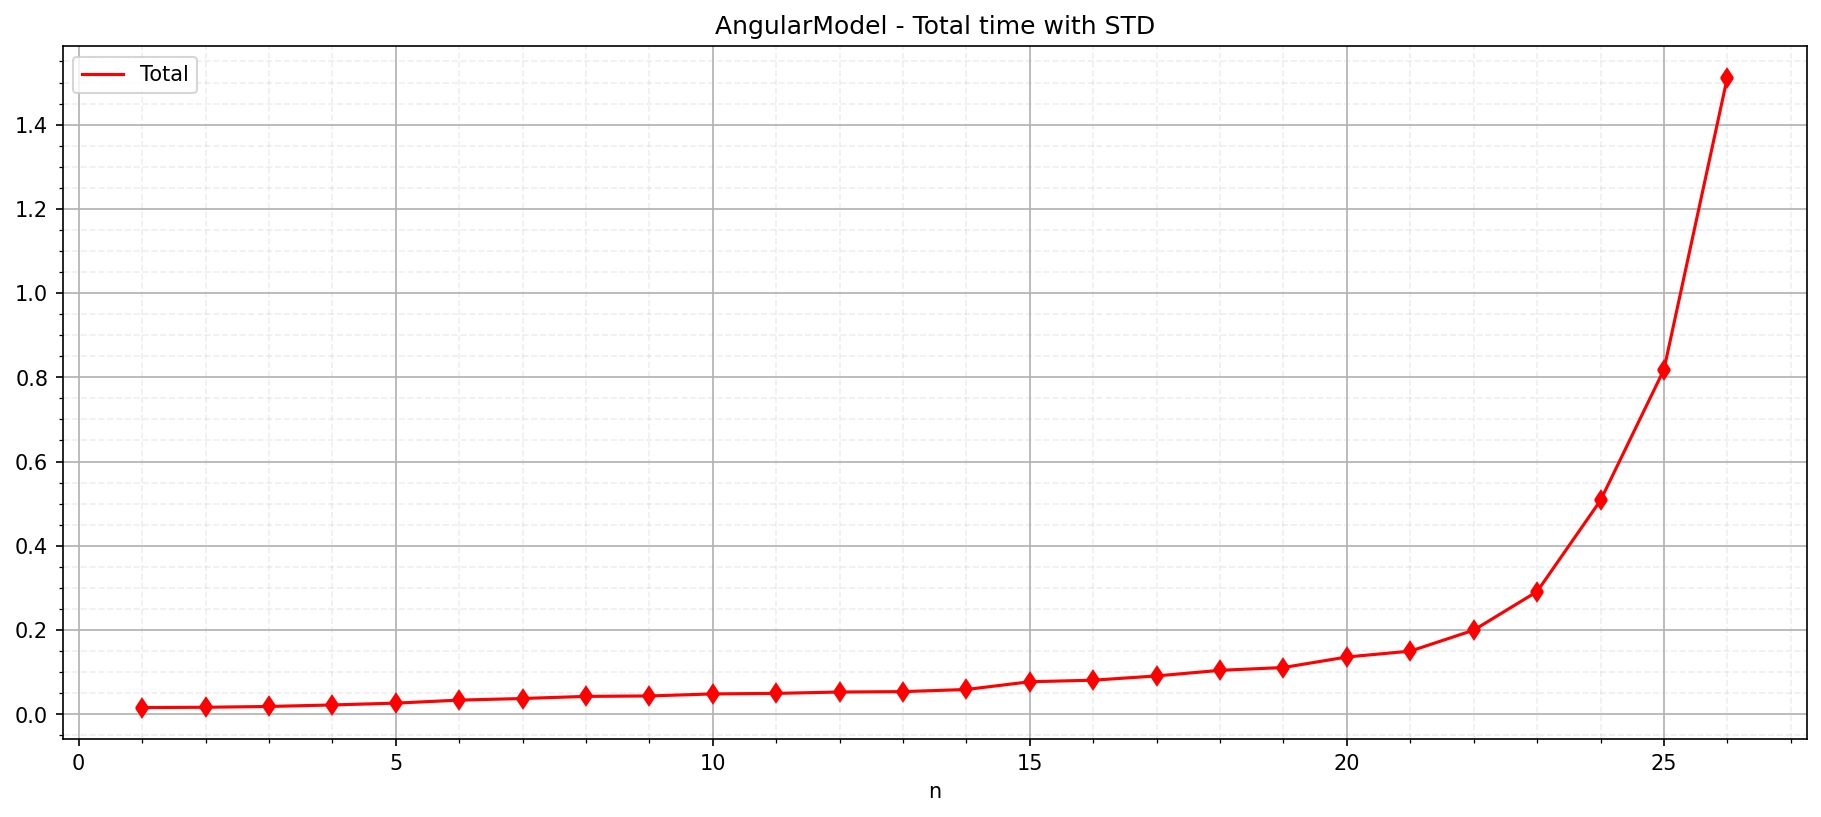

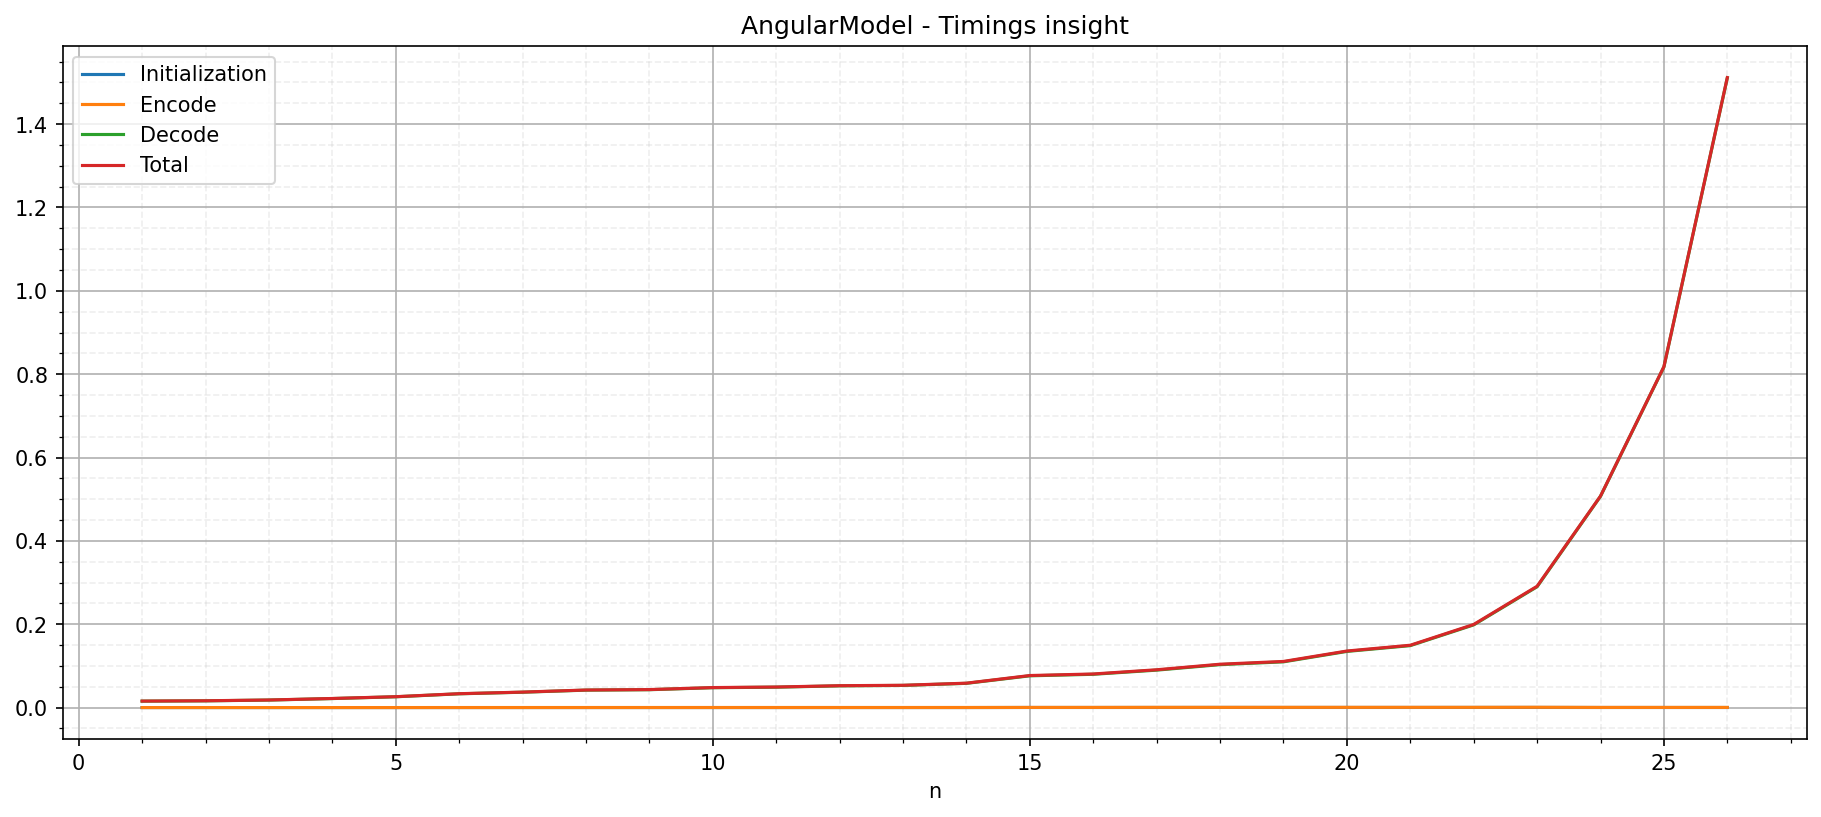

Zooming in:


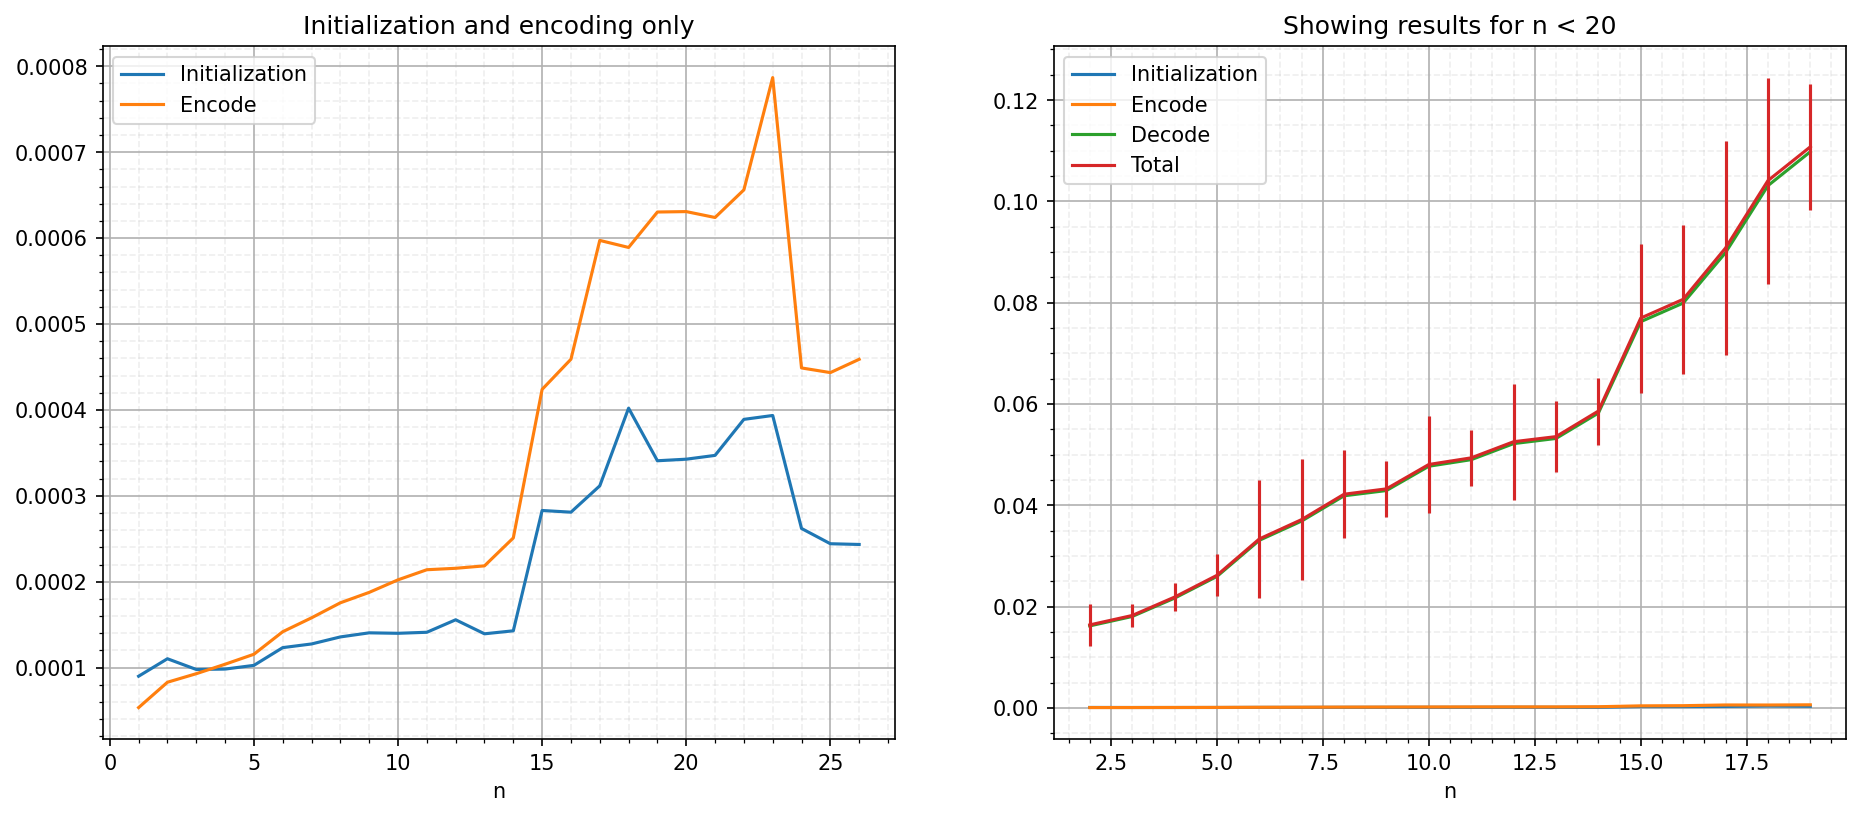

In [18]:
plot_results(df_angular, "AngularModel")

Numerical values:

In [9]:
df_angular

,n,Initialization,Encode,Decode,Total,Total STD
0,1,0.000090,0.000053,0.015489,0.015633,0.034521
1,2,0.000110,0.000083,0.016208,0.016402,0.004183
2,3,0.000098,0.000093,0.018067,0.018258,0.002224
3,4,0.000098,0.000104,0.021688,0.021890,0.002773
4,5,0.000103,0.000116,0.025970,0.026188,0.004132
5,6,0.000123,0.000142,0.033105,0.033370,0.011682
6,7,0.000128,0.000158,0.036914,0.037200,0.012023
7,8,0.000136,0.000175,0.041892,0.042203,0.008696
8,9,0.000140,0.000188,0.042933,0.043261,0.005541
9,10,0.000140,0.000202,0.047731,0.048074,0.009502


___
## LinearModel
We test the initialization, encode and decode time for a input of .5 on each dimension, for increasing dimensions ($n \in [0,26]$)

In [10]:
from qrobot.models import LinearModel

max_n = 26

In [11]:
table = list()

for n in range(1, max_n + 1):
    print(f"Testing n={n}", end="\r")
    table.append(test_model(LinearModel, n))
print("             ")


df_linear = pd.DataFrame(
    table, columns=["n", "Initialization", "Encode", "Decode", "Total", "Total STD"]
)

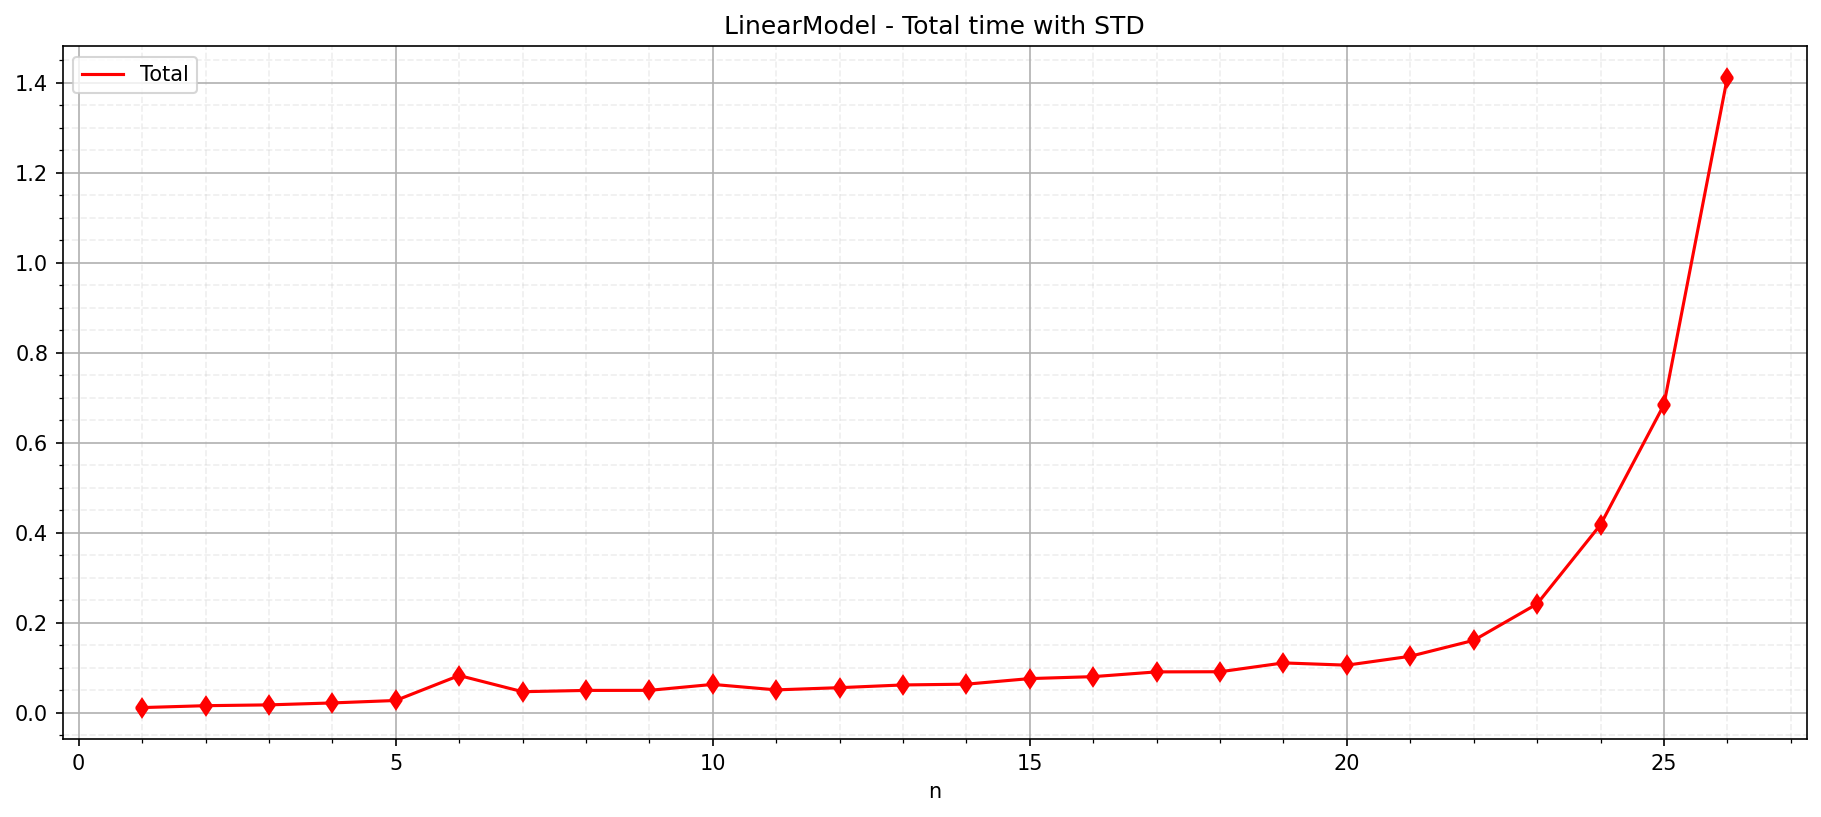

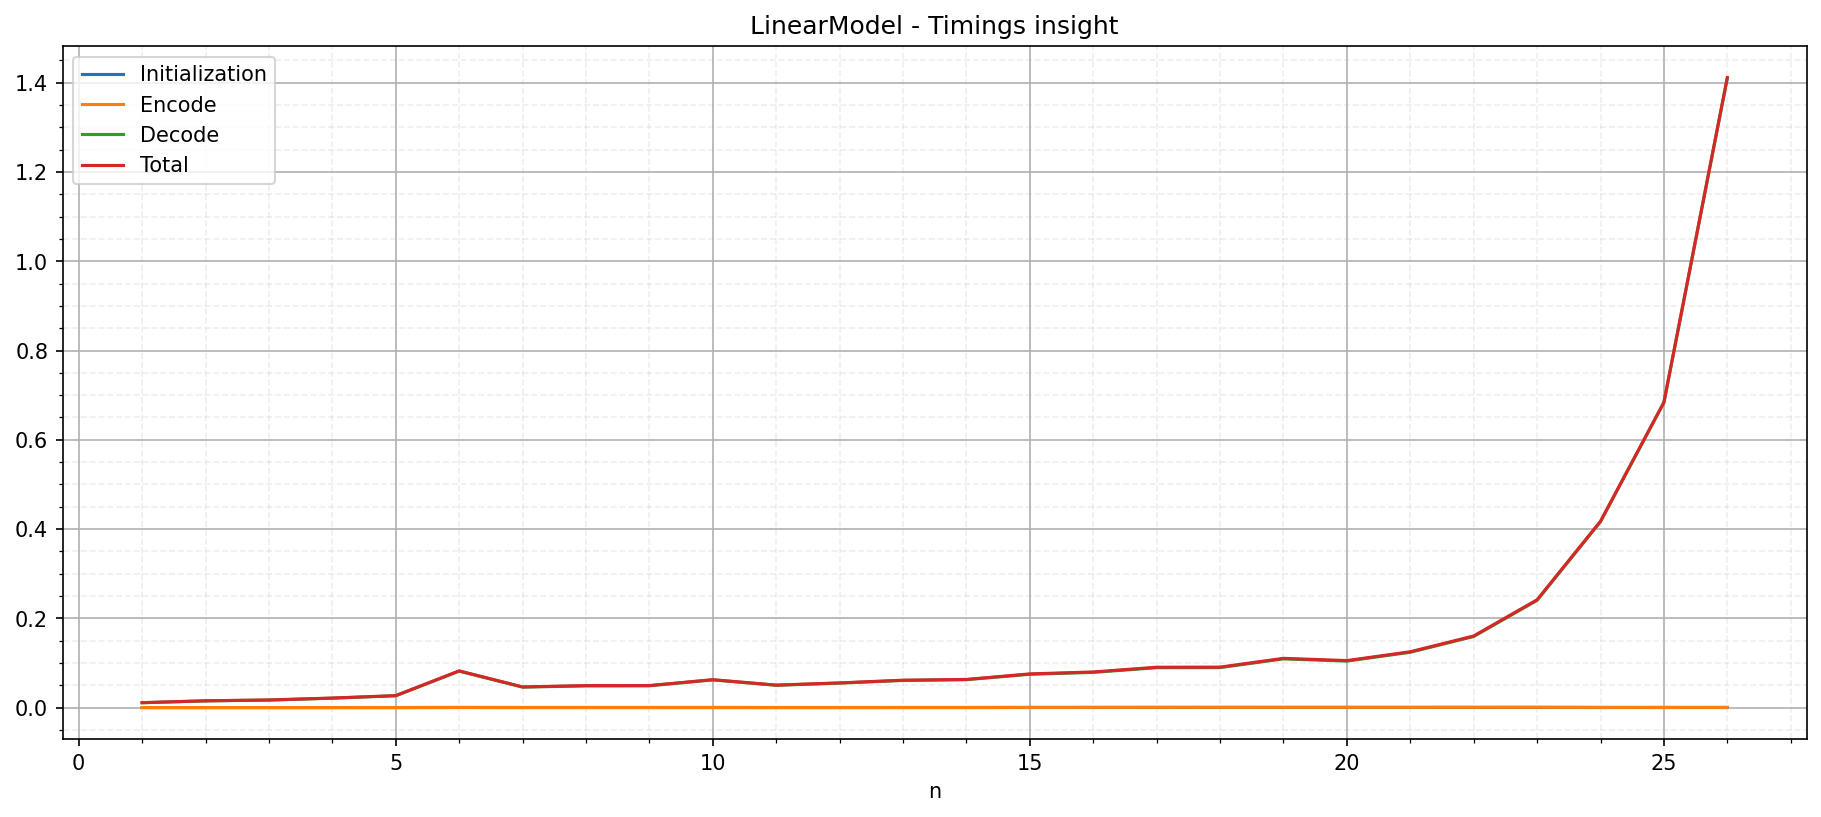

Zooming in:


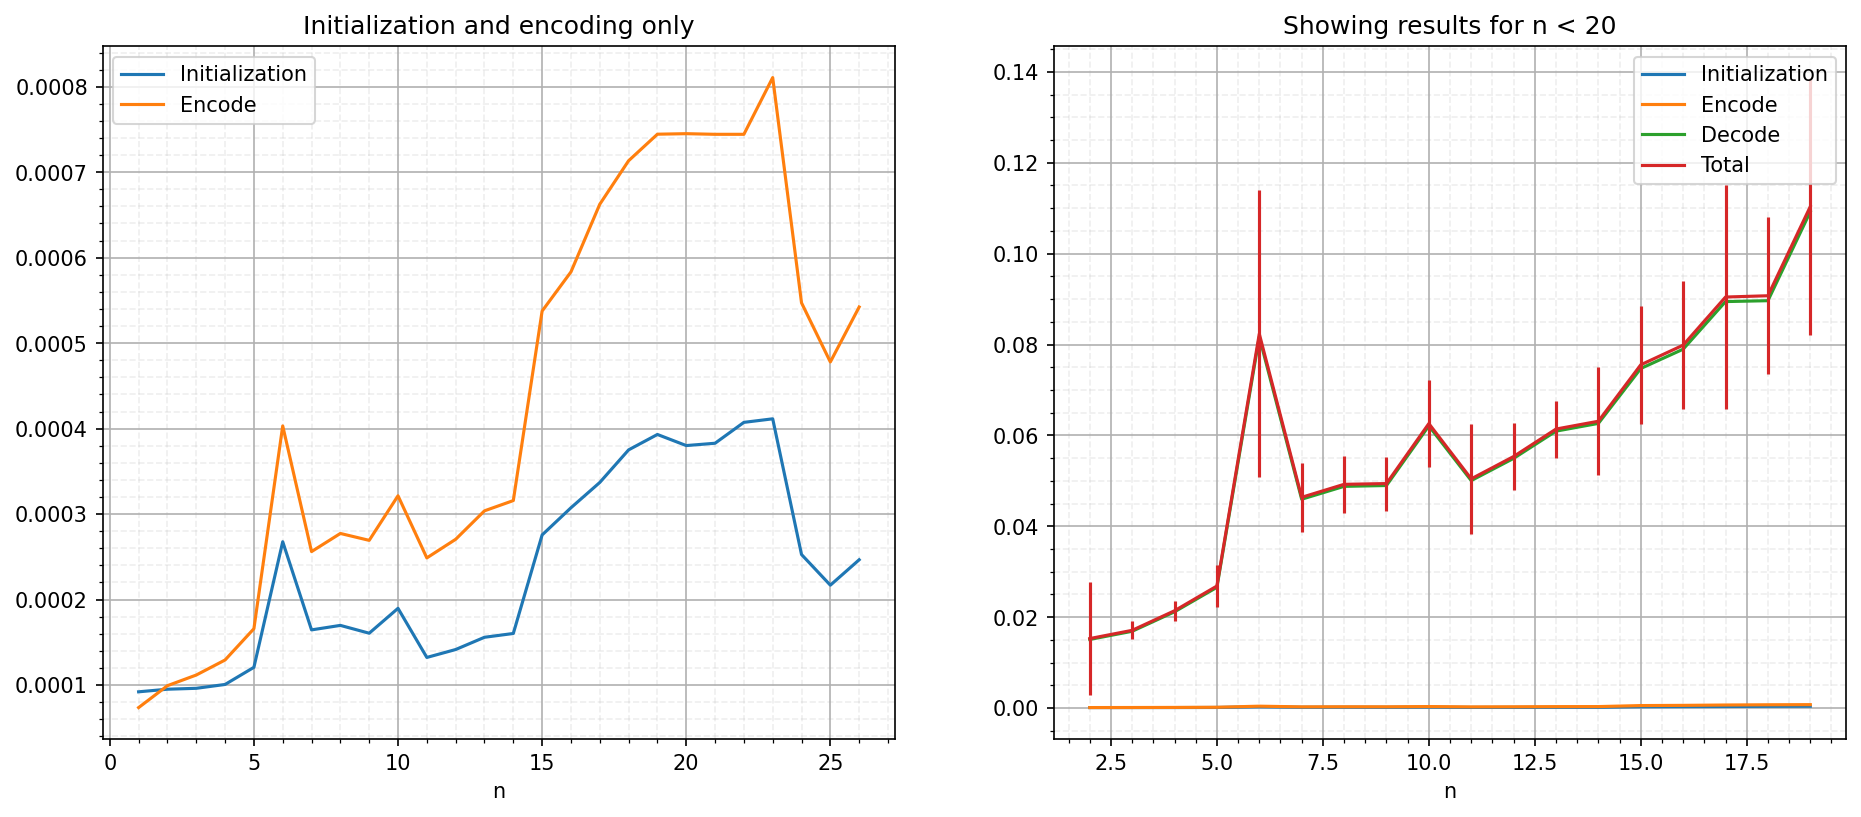

In [19]:
plot_results(df_linear, "LinearModel")

In [13]:
df_linear

,n,Initialization,Encode,Decode,Total,Total STD
0,1,0.000092,0.000074,0.010906,0.011072,0.003508
1,2,0.000095,0.000099,0.015090,0.015284,0.012434
2,3,0.000096,0.000112,0.016888,0.017096,0.001992
3,4,0.000101,0.000129,0.021175,0.021405,0.002223
4,5,0.000121,0.000166,0.026563,0.026849,0.004640
5,6,0.000268,0.000403,0.081685,0.082355,0.031608
6,7,0.000165,0.000256,0.045953,0.046374,0.007647
7,8,0.000170,0.000277,0.048785,0.049232,0.006297
8,9,0.000161,0.000269,0.048968,0.049398,0.005945
9,10,0.000190,0.000321,0.062090,0.062601,0.009553



## Comparison

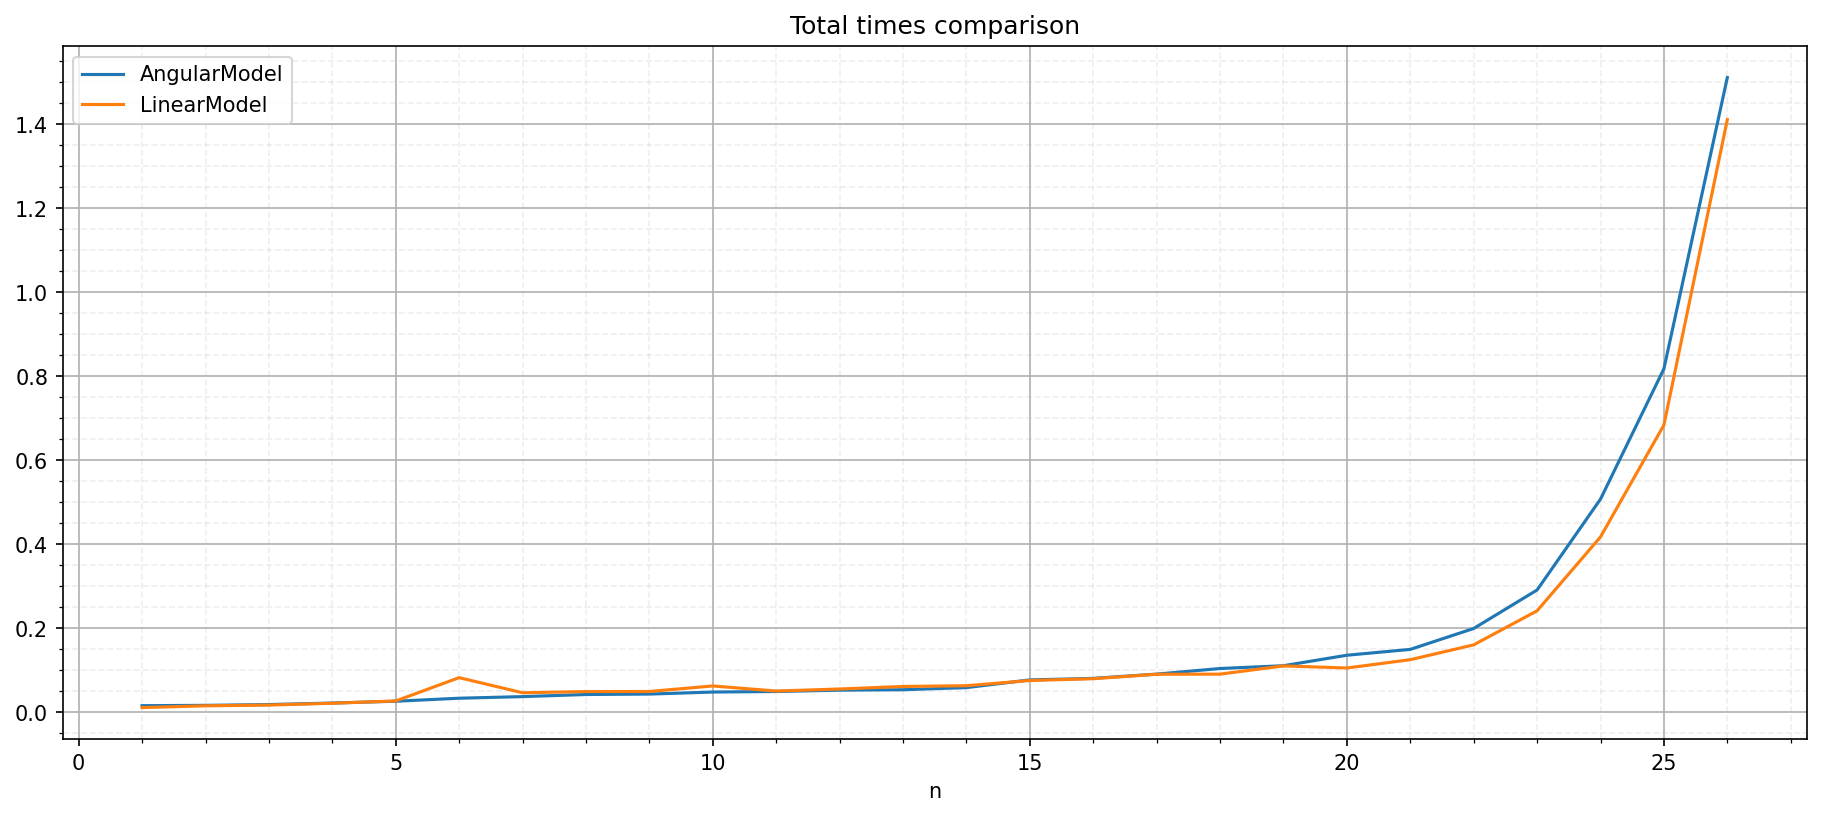

In [20]:
fig = plt.figure(figsize=(15, 6), dpi=150)

df_angular.plot(x="n", y=[4], kind="line", ax=plt.gca())
df_linear.plot(x="n", y=[4], kind="line", ax=plt.gca())
plt.legend(["AngularModel", "LinearModel"])
plt.title("Total times comparison")

plt.grid(visible=True, which="major", linestyle="-")
plt.grid(visible=True, which="minor", linestyle="--", alpha=0.2)
plt.minorticks_on()

plt.show()

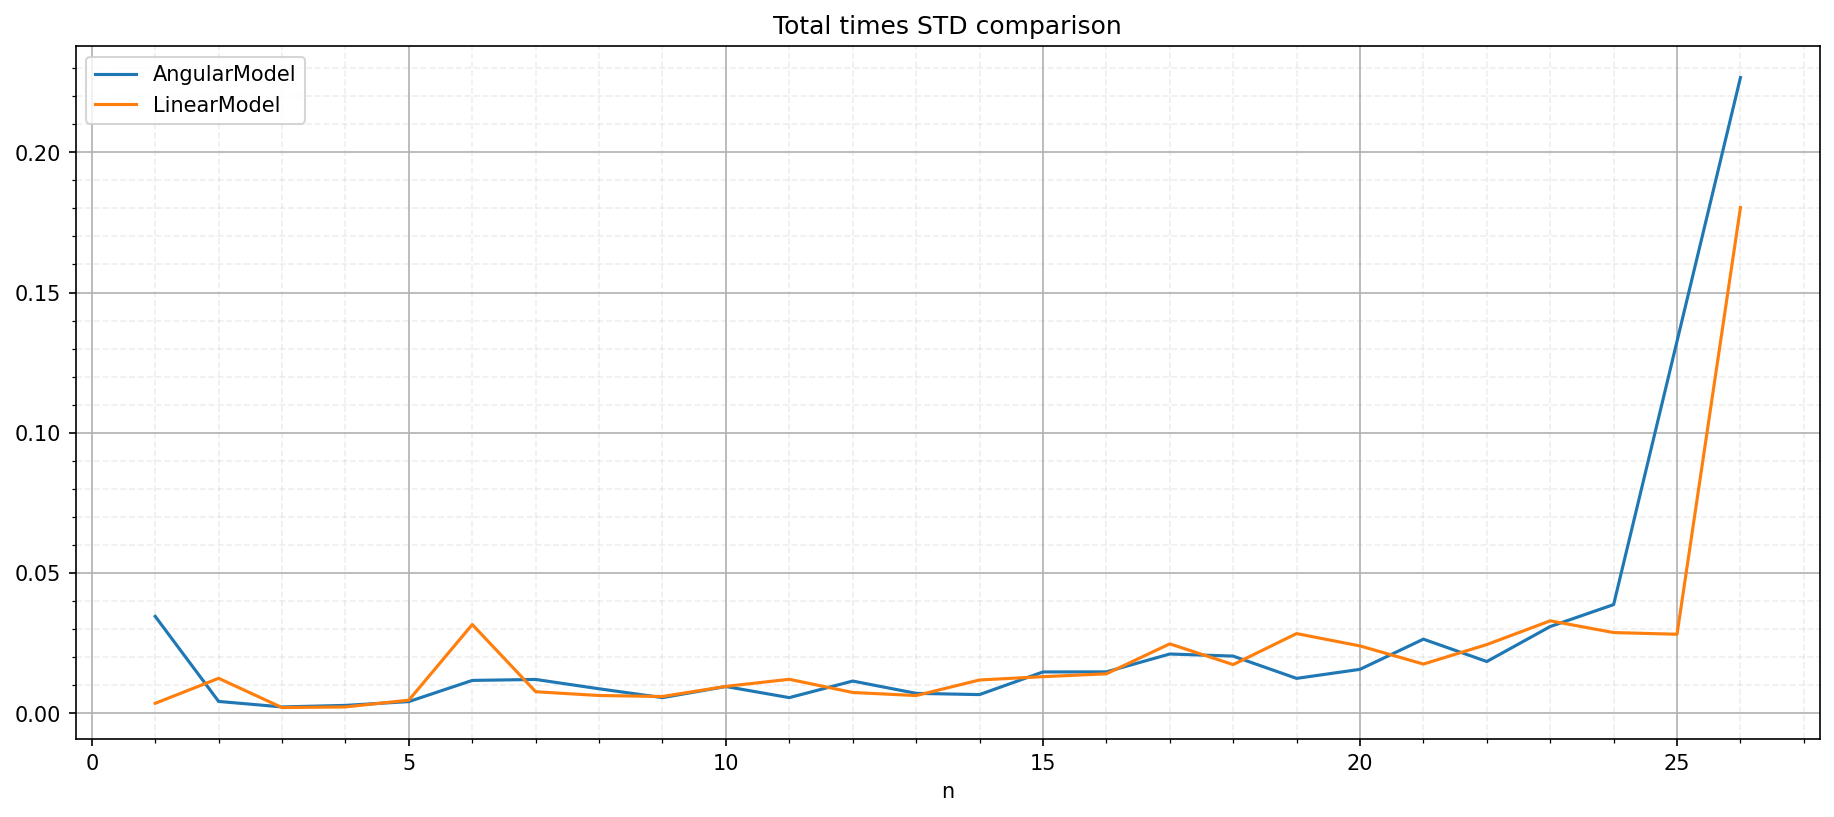

In [21]:
fig = plt.figure(figsize=(15, 6), dpi=150)

df_angular.plot(x="n", y=[5], kind="line", ax=plt.gca())
df_linear.plot(x="n", y=[5], kind="line", ax=plt.gca())

plt.legend(["AngularModel", "LinearModel"])
plt.title("Total times STD comparison")

plt.grid(visible=True, which="major", linestyle="-")
plt.grid(visible=True, which="minor", linestyle="--", alpha=0.2)
plt.minorticks_on()

plt.show()

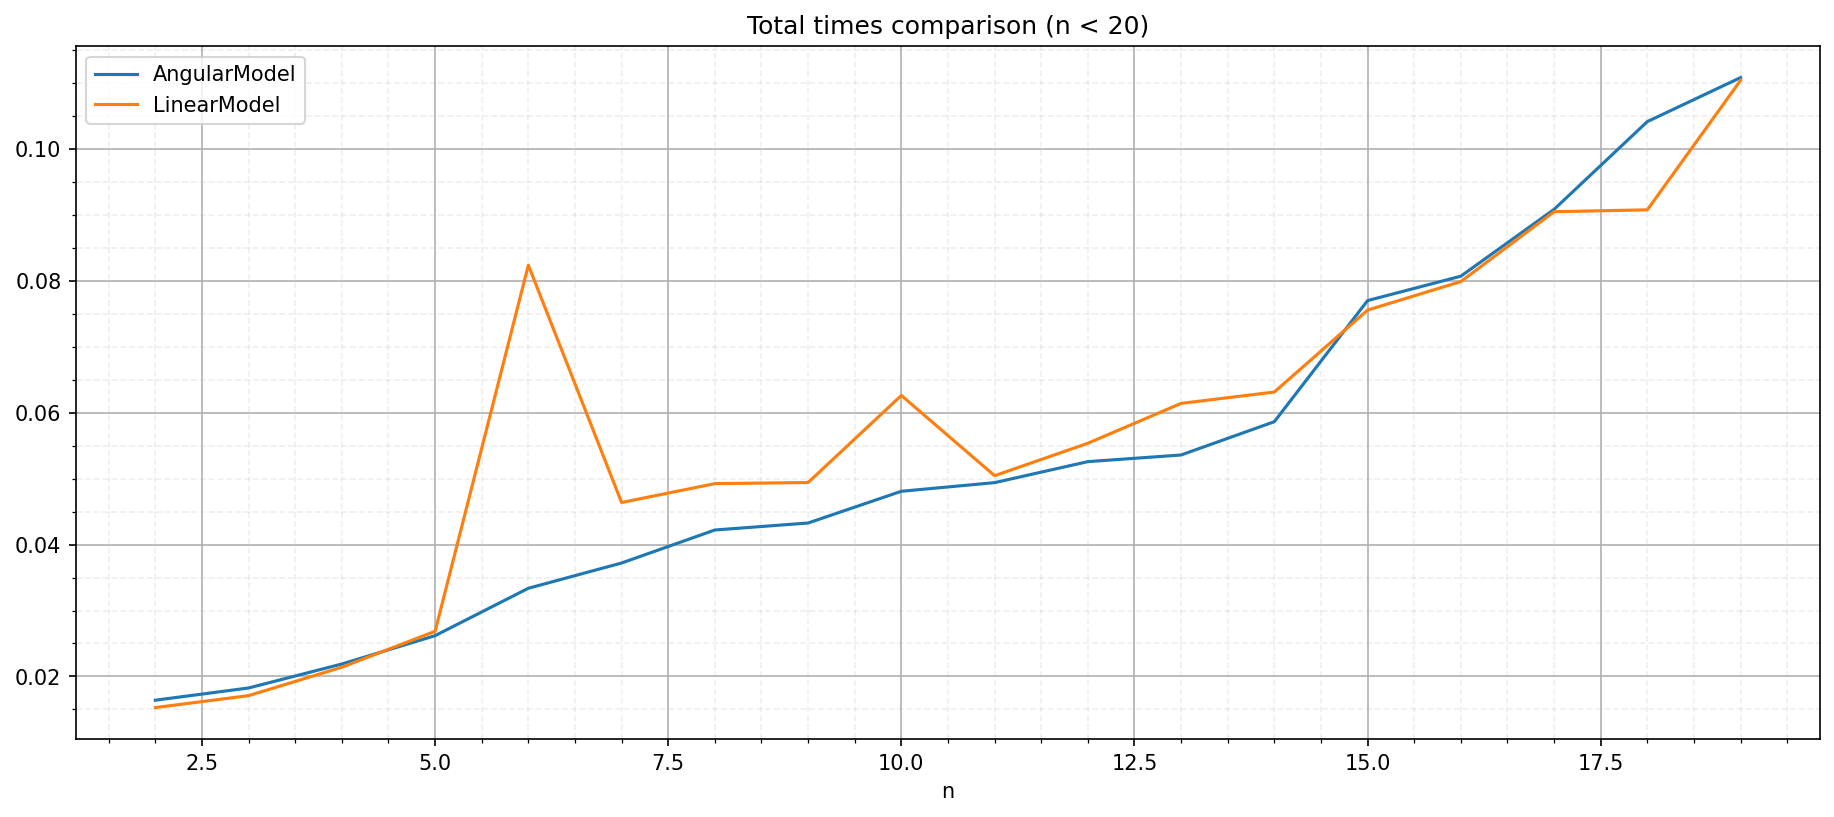

In [22]:
fig = plt.figure(figsize=(15, 6), dpi=150)

df_angular[1:19].plot(x="n", y=[4], kind="line", ax=plt.gca())
df_linear[1:19].plot(x="n", y=[4], kind="line", ax=plt.gca())

plt.legend(["AngularModel", "LinearModel"])
plt.title("Total times comparison (n < 20)")

plt.grid(visible=True, which="major", linestyle="-")
plt.grid(visible=True, which="minor", linestyle="--", alpha=0.2)
plt.minorticks_on()

plt.show()